# BioLGCA - A Mesosocopic Modelling Framework for Collective Phenomena

## Introduction
This Juypter notebook serves as an introduction to the BioLGCA python package. It consists of lattice-gas cellular automaton models for biological systems in 1D and 2D, which can be adapted, simulated and analyzed. First, visualization and simulation methods are introduced. Next, already implemented LGCA models are presented and analyzed. We conclude with a demonstration on how to code and use your own interactions in the BioLGCA framework.

## Class initialization
### Calling the class
To envoke the package and obtain the appropriate class instance, the generic function `get_lgca` of the `base.py` file is used.

In [1]:
from lgca import get_lgca
lgca = get_lgca(geometry='hex')

Random walk interaction is used.


### Setting an interaction
Note that we did not specify the lattice dimensions or an interaction rule, so the default parameters are used. The default interaction is the random walk rule. We can use specific interactions and set the lattice dimensions using keyword arguments, like so

In [2]:
lgca = get_lgca(geometry='hex', dims=(10, 10), interaction='aggregation')

sensitivity set to beta =  2.0


We now used the aggregation rule, which needs a parameter called `beta`, which is set to 2 by default. It can also be set as a keyword argument. All available interactions can be printed using the class method `get_interactions`.

In [3]:
lgca.get_interactions()

['go_and_grow', 'go_or_grow', 'alignment', 'aggregation', 'random_walk', 'excitable_medium', 'nematic', 'persistant_motion']


The interaction can also be changed after initialization using the `set_interaction` method:

In [4]:
lgca.set_interaction(interaction='alignment', beta=3.0)

### Setting the initial state
By default, the initial state is a homogeneous state with constant mean density. The state of the lgca class instance is saved in the array `nodes`. For example, for a 1D LGCA of size 5, without rest channels and with a homogeneous initial state, where each channel is occupied with a probability $\rho = 0.1$, we use

In [5]:
lgca = get_lgca(restchannels=0, density=0.1, dims=5, geometry='lin', bc='refl')

Random walk interaction is used.


We can print the current state as

In [6]:
print(lgca.nodes.astype(int))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


## Simulating the system
A single time step without record can also be done with the method `timestep`:

In [7]:
lgca.timestep()
lgca.nodes.astype(int)

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0]])

To simulate the dynamics for longer times and record the steps we use the class method `timeevo`. It takes the keyword arguments `timesteps`, that sets the number of time steps to simualte. Also, all configurations can be recorded using `record=True`. To only record the density profile set `recorddens=True`. The total number of cells can be recorded with `recordN=True`. By default, only the density profile is recorded.

In [8]:
lgca.timeevo(timesteps=100)
lgca.nodes.astype(int)

Progress: [####################] 100% Done...


array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0]])

## Visualization
Visualization and plotting are different for 1D and 2D lattice geometries. The following section only applies to the 2D lattices, and the 1D equivalent is mentioned at the appropriate sections. 
### Plotting
#### Density profile
The python package offers several methods to visualize LGCA states. A simple method is plotting the current density profile $$n(r,k) = \sum_i s_i (r,k).$$ Consider a LGCA witha square lattice:

Random walk interaction is used.


(<Figure size 576x504 with 2 Axes>,
 <matplotlib.cm.ScalarMappable at 0x7f73b56f7fd0>)

/home/simon/anaconda3/envs/py3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


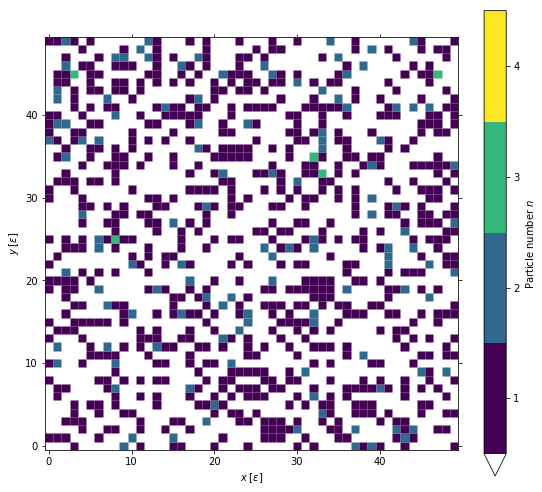

In [9]:
lgca = get_lgca(geometry='square')
lgca.plot_density()

#### Flux
Sometimes it is more useful to plot the local flux $$ \mathbf{J}(r,k) = \sum_i s_i \mathbf{c_i}. $$ This can be achieved like follows:

(<Figure size 576x504 with 2 Axes>,
 <matplotlib.cm.ScalarMappable at 0x7f73b4759080>)

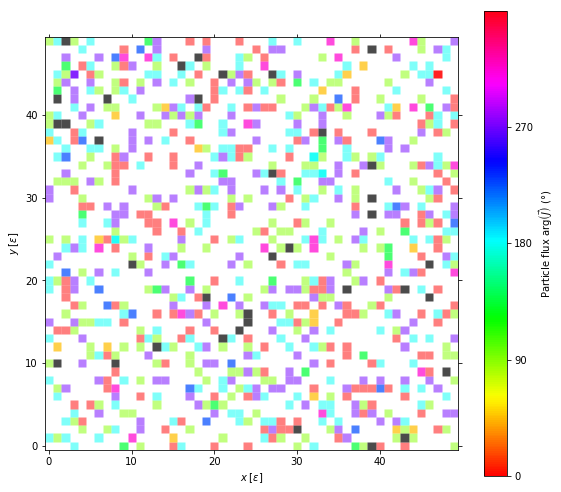

In [10]:
lgca.plot_flux()

Alternatively it is possible to plot a corresponding flow field:

(<Figure size 576x504 with 2 Axes>,
 <matplotlib.cm.ScalarMappable at 0x7f73b46efbe0>)

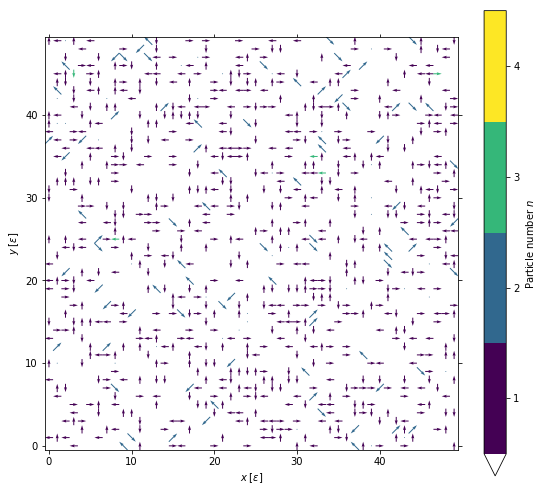

In [11]:
lgca.plot_flow()

#### Full configuration
For sketches, it is sometimes useful to plot the full lattice configuration. This is only advisable on small lattices. See the following example. Notice that the rest channels are depicted as circles, filled by a number, indicating the number of filled rest channels, while the occupied velocity channels are showns as black arrows.

[[[1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 0. 0.]]

 [[1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 1.]]]
Random walk interaction is used.


(<Figure size 576x576 with 1 Axes>,
 [Text(0.0, -0.08838834764831843, '2'),
  Text(0.0, 0.9116116523516815, '0'),
  Text(1.0, -0.08838834764831843, '0'),
  Text(1.0, 0.9116116523516815, '2')])

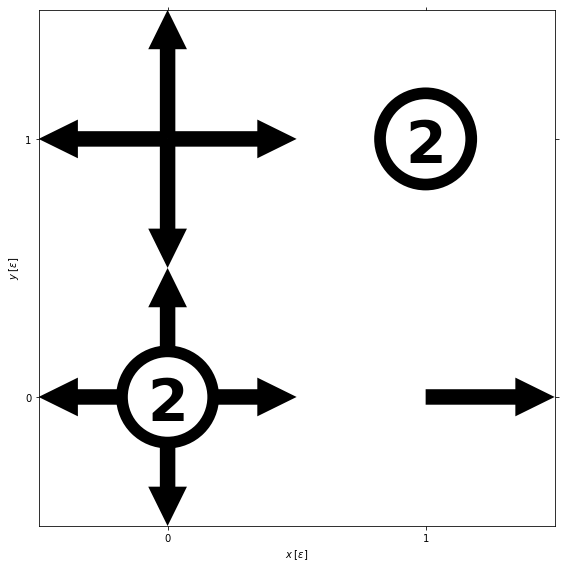

In [12]:
import numpy as np
nodes = np.zeros((2, 2, 6))
nodes[0, 0, :] = 1
nodes[1, 1, 4:] = 1
nodes[0, 1, :4] = 1
nodes[1, 0, 0] = 1
print(nodes)
lgca = get_lgca(geometry='square', density=0.25, nodes=nodes)
lgca.plot_config()

### Animation of dynamics
After recording configurations with the `timeevo` method, we can animate the dynamics (or plot it in a 2D plot, in the 1D case).

In [13]:
lgca = get_lgca(geometry='hex', interaction='aggregation', dims=(10, 10), restchannels=0)
lgca.timeevo(record=True)

sensitivity set to beta =  2.0
Progress: [####################] 100% Done...


To animate the density we use the `animate_density` method like follows

<IPython.core.display.Javascript object>


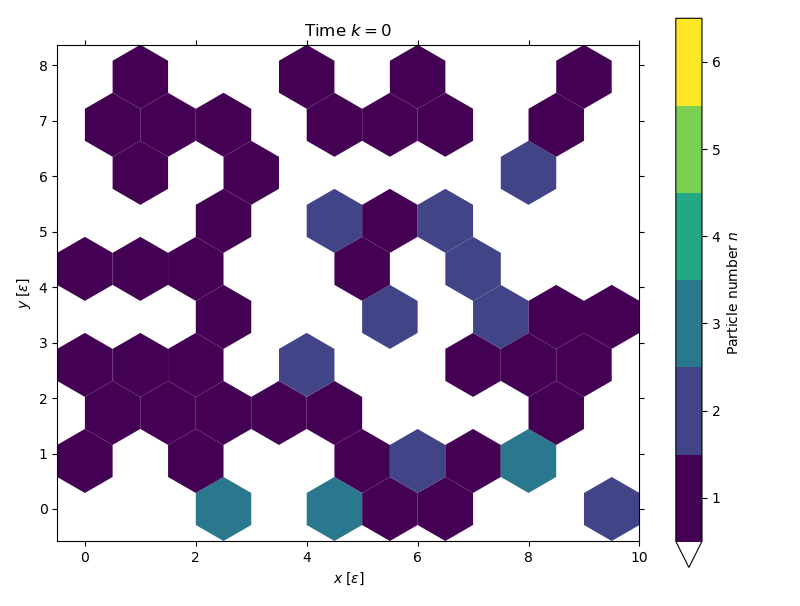

In [14]:
from matplotlib import pyplot as plt
%matplotlib notebook
lgca.animate_density(interval=100)

Similarly, we can animate the flux, flow, and configuration:

<IPython.core.display.Javascript object>


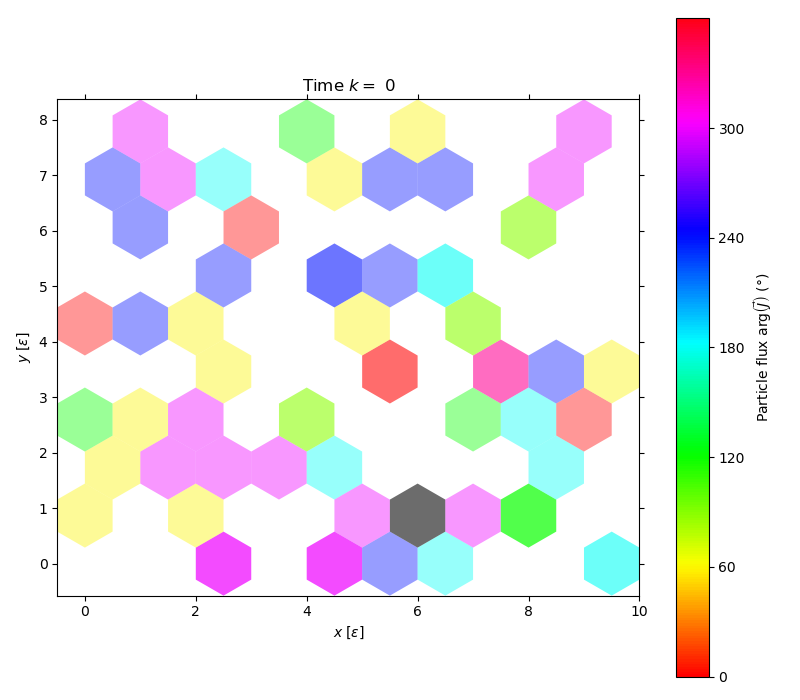

In [15]:
lgca.animate_flux(interval=100)

<IPython.core.display.Javascript object>


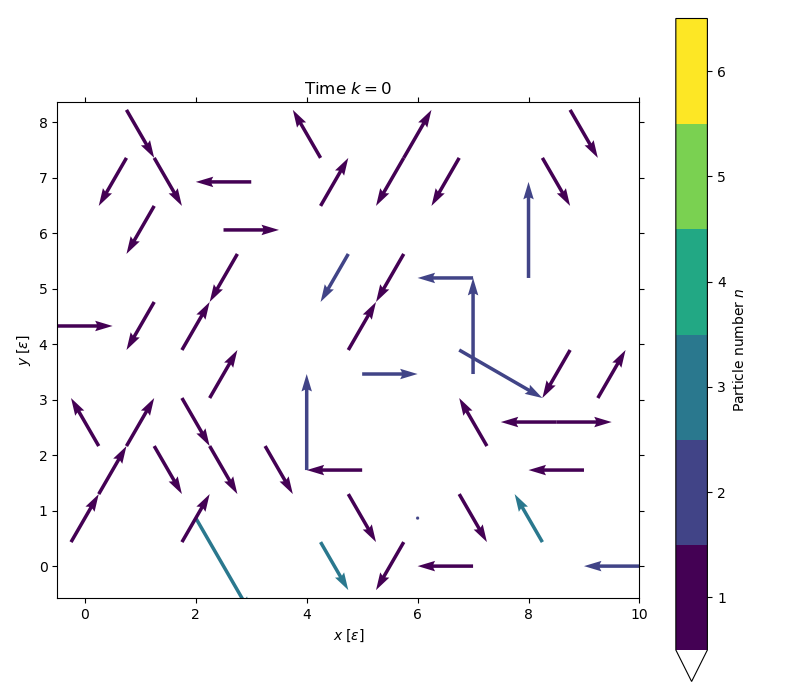

In [16]:
lgca.animate_flow()

<IPython.core.display.Javascript object>


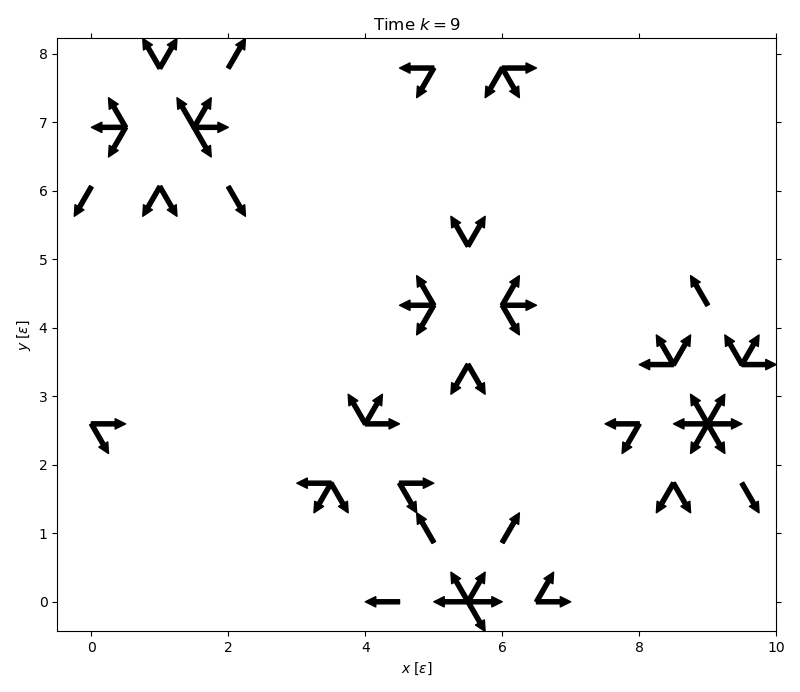

In [17]:
lgca.animate_config()

### Live animations
Using the same logic as before, we can also animate the system on-the-fly. This is especially useful during interaction design and debugging.

<IPython.core.display.Javascript object>


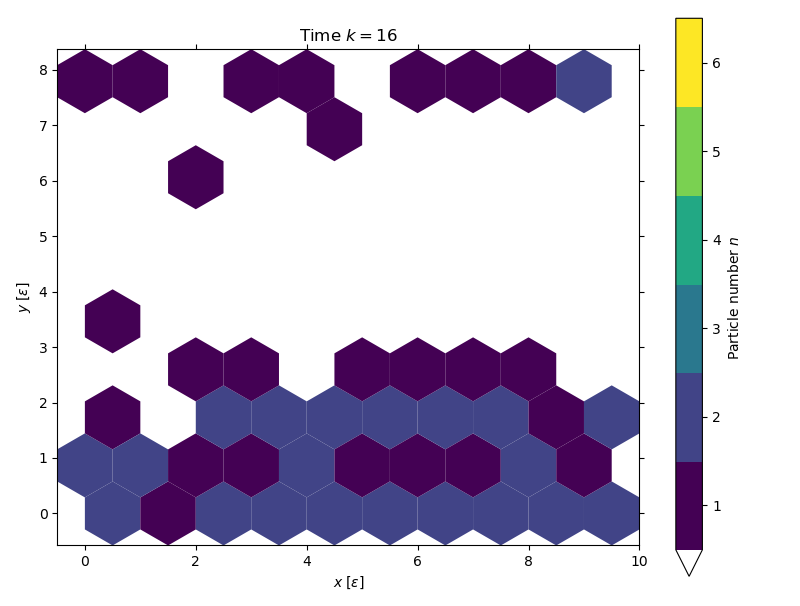

In [22]:
lgca.live_animate_density()

sensitivity set to beta =  2.0


<IPython.core.display.Javascript object>


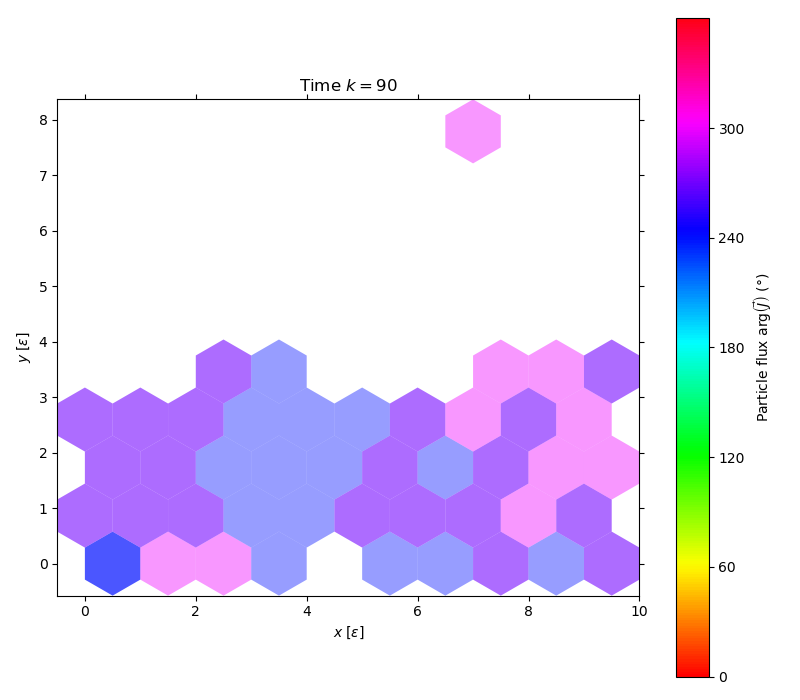

In [20]:
lgca.set_interaction(interaction='alignment')
ani = lgca.live_animate_flux()

We can also change the boundary conditions, e.g. we change from the default periodic boundaries to reflecting boundaries here.

<IPython.core.display.Javascript object>


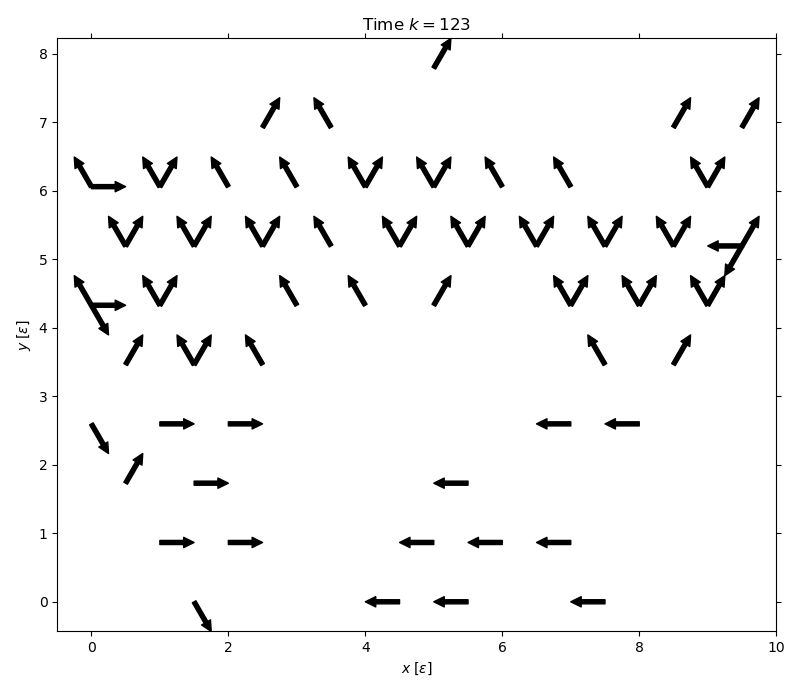

In [24]:
lgca.set_bc('refl')
lgca.live_animate_config()